In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config; set_config(display='diagram')
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [245]:
df = pd.read_csv('../data/stocks_quarterly.csv')

In [274]:
df.head(30)

,fiscalDateEnding,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,...,surprisePercentage,price,nasd_price,next_year_date,next_year_price,nasd_ny_price,symbol,Nasdaq_Performance,Stock_Performance,Label
0,2020-12-31,4.027000e+09,4.027000e+09,4.485000e+09,1.240000e+09,-2.515000e+09,1.860000e+08,NaN,1.127000e+09,5000000.0,...,6.3380,18.100000,13337.160156,2022-01-28,15.640000,13770.570313,AAL,3.249643,-13.591160,0
1,2020-09-30,-2.310000e+09,2.833000e+09,5.143000e+09,1.156000e+09,-2.871000e+09,7.000000e+07,NaN,1.941000e+09,5000000.0,...,3.7309,13.150000,11506.009766,2021-10-22,19.150000,15090.200195,AAL,31.150594,45.627378,1
2,2020-06-30,-2.601000e+09,1.368000e+09,3.969000e+09,8.660000e+08,-2.486000e+09,4.300000e+07,NaN,1.133000e+09,10000000.0,...,0.9575,11.770000,10461.419922,2021-07-23,21.200001,14836.990234,AAL,41.825778,80.118946,1
3,2020-03-31,1.241000e+09,8.258000e+09,7.017000e+09,2.197000e+09,-2.549000e+09,3.050000e+08,NaN,2.857000e+09,21000000.0,...,-12.5218,12.010000,8889.549805,2021-04-30,21.719999,13962.679688,AAL,57.068468,80.849283,1
4,2019-12-31,1.118900e+10,1.131300e+10,1.240000e+08,2.633000e+09,7.290000e+08,5.030000e+08,NaN,1.240000e+08,24000000.0,...,-0.5104,28.799999,9402.480469,2021-01-22,15.820000,13543.059570,AAL,44.037093,-45.069444,0
5,2019-09-30,4.329000e+09,1.162700e+10,7.298000e+09,2.854000e+09,8.080000e+08,4.240000e+08,NaN,2.508000e+09,34000000.0,...,1.6100,29.410000,8185.799805,2020-10-23,12.600000,11548.280273,AAL,41.076994,-57.157428,0
6,2019-06-30,4.615000e+09,1.168500e+10,7.070000e+09,2.864000e+09,1.153000e+09,4.010000e+08,NaN,2.277000e+09,35000000.0,...,1.7726,31.670000,8238.540039,2020-07-24,11.390000,10363.179688,AAL,25.789031,-64.035364,0
7,2018-12-31,1.071100e+10,1.093800e+10,2.270000e+08,2.748000e+09,5.710000e+08,4.720000e+08,NaN,2.270000e+08,34000000.0,...,3.4106,33.660000,7073.459961,2020-01-24,27.639999,9314.910156,AAL,31.688173,-17.884731,0
8,2018-09-30,4.077000e+09,1.129400e+10,7.217000e+09,3.043000e+09,6.850000e+08,3.950000e+08,NaN,2.341000e+09,29000000.0,...,0.4177,32.369999,7318.339844,2019-10-25,30.860001,8243.120117,AAL,12.636476,-4.664808,0
9,2018-06-30,4.369000e+09,1.137700e+10,7.008000e+09,2.898000e+09,1.004000e+09,3.478000e+09,NaN,5.441000e+09,30000000.0,...,2.4706,40.020000,7852.180176,2019-07-26,31.240000,8330.209961,AAL,6.087861,-21.939032,0


In [116]:
df.shape

(7887, 102)

In [117]:
cols_to_drop = df.isnull().mean().sort_values(ascending = False).head(45).index

In [118]:
cols_to_drop = list(cols_to_drop) + ['fiscalDateEnding','reportedDate','price','nasd_price','next_year_date','next_year_price','nasd_ny_price','symbol','Nasdaq_Performance', 'Stock_Performance','Label']

In [119]:
X = df.drop(columns = 'Label')
y = df.Label

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [121]:
columns = list(df.columns)

for colum in cols_to_drop:
    columns.remove(colum)

In [125]:
column_transformer = make_column_transformer((SimpleImputer(strategy = 'constant',fill_value=0),columns),
                                              remainder="drop")

pipline = make_pipeline(column_transformer, StandardScaler())

In [126]:
X_train = pipline.fit_transform(X_train)
X_test = pipline.transform(X_test)

In [127]:
X_train.shape

(6309, 46)

In [155]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam

def initialize_model():
    
    model = models.Sequential()

    model.add(layers.Dense(1024, activation='relu', input_dim=46))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.25))


    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='BinaryCrossentropy', 
                  optimizer=Adam(learning_rate=0.0005), 
                  metrics=['accuracy',metrics.Precision()]) 
    
    return model



In [158]:

history = model.fit(X_train,y_train, batch_size = 16,validation_split= 0.2, epochs = 500)

Epoch 1/500
316/316 [==============================] - 8s 27ms/step - loss: 0.6188 - accuracy: 0.6701 - precision_10: 0.6147 - val_loss: 3.2153 - val_accuracy: 0.6712 - val_precision_10: 0.5385
Epoch 2/500
316/316 [==============================] - 8s 25ms/step - loss: 0.6209 - accuracy: 0.6689 - precision_10: 0.5905 - val_loss: 6.1543 - val_accuracy: 0.6696 - val_precision_10: 0.4762
Epoch 3/500
316/316 [==============================] - 8s 25ms/step - loss: 0.6177 - accuracy: 0.6711 - precision_10: 0.6875 - val_loss: 20.9075 - val_accuracy: 0.6688 - val_precision_10: 0.4583
Epoch 4/500
316/316 [==============================] - 8s 24ms/step - loss: 0.6691 - accuracy: 0.6709 - precision_10: 0.6465 - val_loss: 6.1431 - val_accuracy: 0.6704 - val_precision_10: 0.5000
Epoch 5/500
316/316 [==============================] - 8s 26ms/step - loss: 0.6189 - accuracy: 0.6705 - precision_10: 0.6134 - val_loss: 4.1369 - val_accuracy: 0.6609 - val_precision_10: 0.3846
Epoch 6/500
316/316 [========

In [249]:
def plot_history(history):
    fig = plt.figure(figsize = (10,10))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

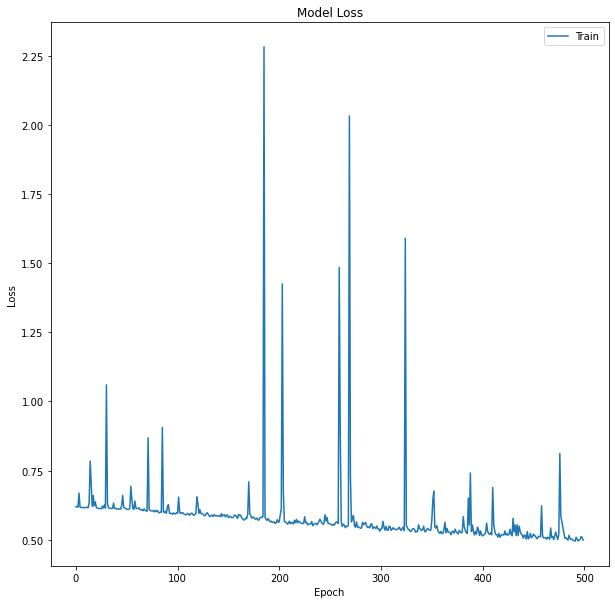

In [250]:
plot_history(history)

In [162]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 6ms/step - loss: 15.5798 - accuracy: 0.6483 - precision_10: 0.4675


[15.579841613769531, 0.6482889652252197, 0.4675324559211731]

In [253]:
from sklearn.metrics import confusion_matrix

In [271]:
y_pred = model.predict(X_test)

In [272]:
y_pred = np.where(y_pred>0.9,1,0)

In [273]:
confusion_matrix(y_test,y_pred,labels = [1,0])

array([[ 44, 496],
       [ 47, 991]])